In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import glob
from scipy import stats,signal

%matplotlib inline
%load_ext autoreload
%autoreload

from conv.general import *
import conv.neuralynx_io as nlxio
import neo

# remove all warnings:
import warnings
warnings.filterwarnings("ignore", message="Unable to parse")
warnings.filterwarnings("ignore", message="Invalid")

## load macro LFP from neuralynx

In [2]:
desired_samplerate = 1000 # Hz

# p555 test load of pre-sleep data
dir_name = "/Users/XinNiuAdmin/Documents/NWBTest/D555/EXP3_Movie_24_Pre_Nap/2022-08-02_13-25-41/"
file_names = glob.glob(f"{dir_name}/LAC*.ncs")

lfp_mat = []
for fn in file_names:
    print(fn)
    lfp_mat = superVstack(lfp_mat, nlxio.load_ncs(fn)['data']) # superVstack is a helper file in the general.py that John made
    print(nlxio.load_ncs(fn)['sampling_rate'])


/Users/XinNiuAdmin/Documents/NWBTest/D555/EXP3_Movie_24_Pre_Nap/2022-08-02_13-25-41/LAC1.ncs
2000
/Users/XinNiuAdmin/Documents/NWBTest/D555/EXP3_Movie_24_Pre_Nap/2022-08-02_13-25-41/LAC2.ncs
2000
/Users/XinNiuAdmin/Documents/NWBTest/D555/EXP3_Movie_24_Pre_Nap/2022-08-02_13-25-41/LAC3.ncs
2000


In [3]:
print(np.shape(lfp_mat))
sr = nlxio.load_ncs(fn)['sampling_rate']
print('Length of data: ' + str(np.shape(lfp_mat)[1]/sr) + ' seconds')

(3, 7286784)
Length of data: 3643.392 seconds


## load macro LFP with neo

In [4]:
reader = neo.io.NeuralynxIO(dirname=dir_name, exclude_filename = ['GA1-RMH1.ncs', 'GA1-RMH2.ncs', 'GA1-RMH3.ncs'])
reader.parse_header()

In [5]:
reader.file_headers['/Users/XinNiuAdmin/Documents/NWBTest/D555/EXP3_Movie_24_Pre_Nap/2022-08-02_13-25-41/LAC1.ncs']

NlxHeader([('channel_names', ['LAC1']),
           ('FileType', 'NCS'),
           ('FileVersion', '3.4'),
           ('RecordSize', '1044'),
           ('sampling_rate', 2000.0),
           ('ADMaxValue', '32767'),
           ('bit_to_microVolt', [0.091552734375]),
           ('NumADChannels', '1'),
           ('channel_ids', [78]),
           ('InputRange', [3000]),
           ('input_inverted', True),
           ('DSPLowCutFilterEnabled', 'True'),
           ('DspLowCutFrequency', '0.1'),
           ('DspLowCutNumTaps', '0'),
           ('DspLowCutFilterType', 'DCO'),
           ('DSPHighCutFilterEnabled', 'True'),
           ('DspHighCutFrequency', '500'),
           ('DspHighCutNumTaps', '256'),
           ('DspHighCutFilterType', 'FIR'),
           ('DspDelayCompensation', 'Enabled'),
           ('DspFilterDelay_µs', '3984'),
           ('SessionUUID', 'dcae1f9e-7776-4be3-b2be-a6d38033978a'),
           ('FileUUID', '7c9f70e3-2ad4-48a3-b551-8dba907dfd19'),
           ('ProbeName'

In [11]:
nlxio.load_ncs(file_names[0])['header']

{'TimeOpened': 'leVersion 3.4',
 'TimeOpened_dt': None,
 'TimeClosed': 'leUUID 7c9f70e3-2ad4-48a3-b551-8dba907dfd19',
 'TimeClosed_dt': None,
 'SessionUUID': 'dcae1f9e-7776-4be3-b2be-a6d38033978a',
 'OriginalFileName': '"E:\\ATLASData\\D555\\EXP3_Movie_24\\2022-08-02_13-25-41\\LAC1.ncs"',
 'RecordSize': '1044',
 'SamplingFrequency': '2000',
 'ADMaxValue': '32767',
 'ADBitVolts': '0.000000091552734375000002',
 'AcqEntName': 'LAC1',
 'NumADChannels': '1',
 'ADChannel': '78',
 'InputRange': '3000',
 'InputInverted': 'True',
 'DSPLowCutFilterEnabled': 'True',
 'DspLowCutFrequency': '0.1',
 'DspLowCutNumTaps': '0',
 'DspLowCutFilterType': 'DCO',
 'DSPHighCutFilterEnabled': 'True',
 'DspHighCutFrequency': '500',
 'DspHighCutNumTaps': '256',
 'DspHighCutFilterType': 'FIR',
 'DspDelayCompensation': 'Enabled',
 'DspFilterDelay_µs': '3984'}

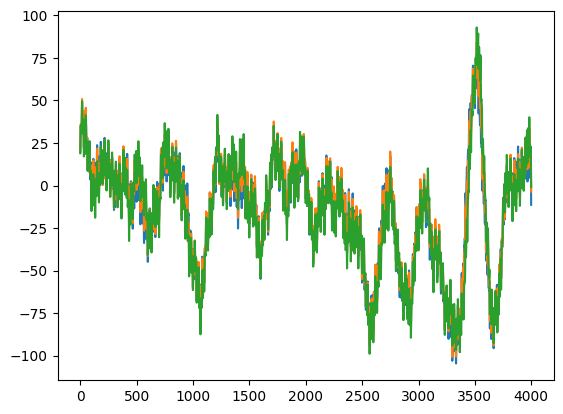

In [6]:
plt.plot(lfp_mat[:, :sr*2].T*-1)

Text(0, 0.5, 'Membrane potential (uV)')

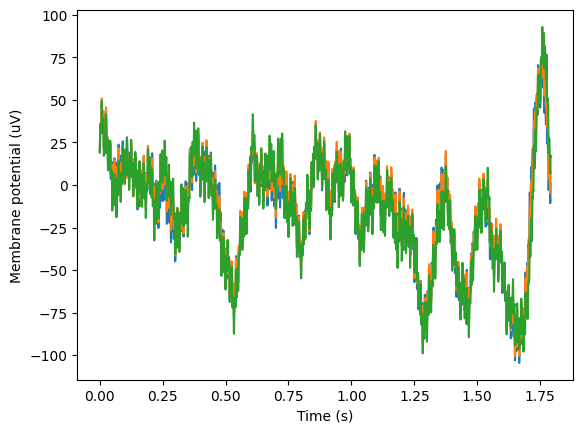

In [7]:
data = reader.read()
analog_signal = data[0].segments[0].analogsignals[0]
plt.plot(analog_signal.times, analog_signal)
plt.xlabel(f"Time ({analog_signal.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({analog_signal.units.dimensionality.string})")

## 

Shape of LFP matrix (channel X time):
(3, 3643392)


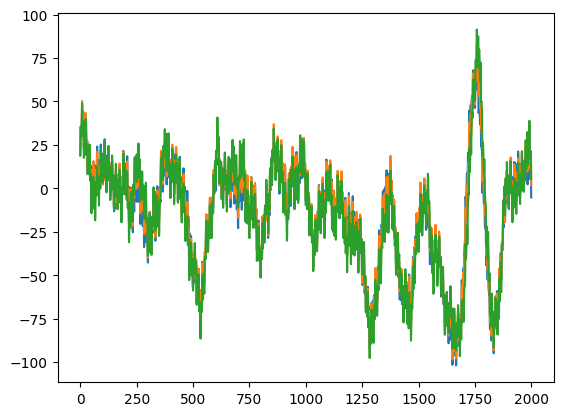

In [9]:
lfp_mat2 = signal.decimate(lfp_mat, int(sr/desired_samplerate)) # Only if you're looking to decimate micros from 32kHz
time_in_sec = np.linspace(1, np.shape(lfp_mat2)[1], np.shape(lfp_mat2)[1]) / desired_samplerate

print('Shape of LFP matrix (channel X time):')
print(np.shape(lfp_mat2))
plt.plot(lfp_mat2[:, :desired_samplerate*2].T*-1)